### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

# Computer Lab 5

Provide answers to the problems in the boxes provided.  Partial marks will be awarded for
participation and engagement.

**Important:** When finished, print this notebook into a **pdf** file and submit this pdf to
**canvas**.  (Submissions in other formats will not be accepted.)

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github repository](https://github.com/gpfeiffer/cs2101).

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

* First, import some packages

In [196]:
import numpy as np
import matplotlib.pyplot as plt

* Set up a random nimber generator `rng`.

In [197]:
rng = np.random.default_rng()

## 1. Sorting and Ranking

1. Use the random number generator to make a list of $10$ random values between $0$ and $1$, perhaps as a numpy array `values` of length $10$. 

In [198]:
values = rng.random(10)
values

array([0.88039035, 0.30113204, 0.38125883, 0.25528483, 0.54249406,
       0.05316244, 0.55730341, 0.02411244, 0.18998993, 0.72295686])

2. Look up the documentation for the functions `np.sort` and `np.argsort`.  What do they have in common, what is the difference?
   Use `np.sort` to compute as array `ranked` a sorted copy of the `values` array.  Use `np.argsort` to compute as array `ranks` the list of sorting indices for the array `values`.

`np.sort`  : returns a sorted copy of an array
`np.argsort` : returns the indexes that would sort the array

In [199]:
ranked = np.sort(values)
ranks = np.argsort(values)

display(ranked)
display(ranks)

array([0.02411244, 0.05316244, 0.18998993, 0.25528483, 0.30113204,
       0.38125883, 0.54249406, 0.55730341, 0.72295686, 0.88039035])

array([7, 5, 8, 3, 1, 2, 4, 6, 9, 0])

3.  Check that the array `values[ranks]` is equal to array `ranked`. 

In [200]:
np.array_equal(values[ranks], ranked)

True

##  2. Random Points

1. Use the random number generator to make a list of $10$ random points in the $x, y$-plane, with coordinates between $0$ and $1$, perhaps as a numpy array `points` of shape $10 \times 2$.

In [201]:
points = rng.random((10,2))
points

array([[0.39210565, 0.76035556],
       [0.3320493 , 0.60125504],
       [0.40376137, 0.32773391],
       [0.35053992, 0.70499379],
       [0.36276395, 0.54903695],
       [0.46767661, 0.7284032 ],
       [0.51210083, 0.60340211],
       [0.86316661, 0.20585777],
       [0.38471474, 0.82320507],
       [0.06365622, 0.6970839 ]])

2. Use slicing and indices to select the $x$-values of your points and plot them against `range(10)`.  Do the same for the $y$-values of your points.

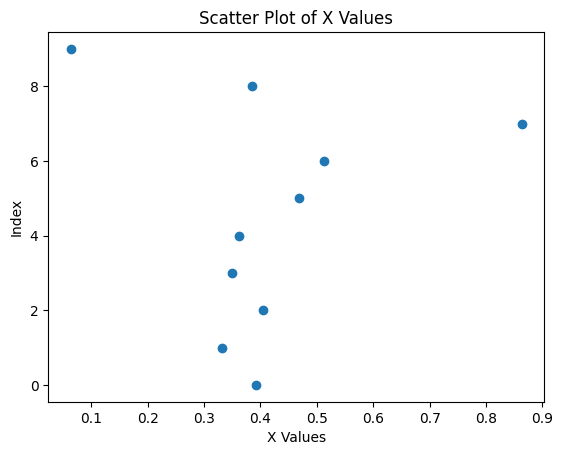

In [202]:
plt.scatter(points[:,0], np.arange(10))
plt.xlabel('X Values')
plt.ylabel('Index')
plt.title('Scatter Plot of X Values')
plt.show();

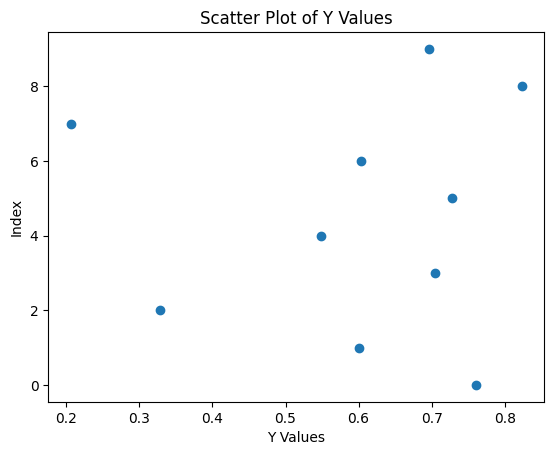

In [203]:
plt.scatter(points[:,1], np.arange(10))
plt.xlabel('Y Values')
plt.ylabel('Index')
plt.title('Scatter Plot of Y Values')
plt.show();

3. Plot the $10$ points as a scatter plot in the $x, y$-plane.

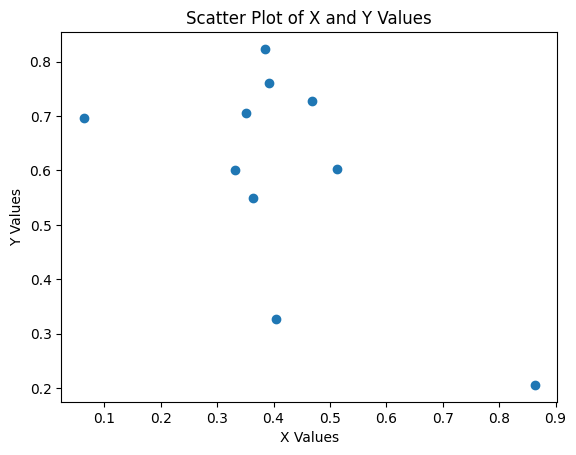

In [204]:
plt.scatter(points[:,0], points[:,1])
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X and Y Values')
plt.show();

## 3. Extra Dimensions

* One way in which Numpy extends Python's indexing scheme to its multidimensional arrays is by allowing us to add an extra dimension.  This is done by using the constant `None`, or `np.newindex`, as an index-or-slice. The effect is the same as if using an extra argument `1` in a `reshape` command.
  Look up the documentation for `np.newindex`.

1. What is the shape of `points[:,np.newaxis,:]` ?

In [205]:
points[:,np.newaxis,:].shape

(10, 1, 2)

2. What is the shape of `points[np.newaxis,:,:]` ?

In [206]:
points[np.newaxis,:,:].shape

(1, 10, 2)

3. What is the shape of `points[None,:,None,:]`?

In [207]:
points[None, :, None, :].shape

(1, 10, 1, 2)

## 4. Broadcasting

* Recall Broadcasting: two numpy arrays can be added if the have the "same" shape. Same shape means same number of dimensions and in each dimension, the same size unless one of the sizes is $1$.  In that case the entry is repeated as often as needed in that dimension.  Lokok up the documentation of `np.broadcast` and `np.boradcast_to`.

1. Compute `np.broadcast_to(points[:,None,:], (10,10,2))` and assign the result to `points1`.  What is the shape of `points1`?

In [208]:
points1 = np.broadcast_to(points[:,None,:], (10,10,2))
points1.shape

(10, 10, 2)

2. Compute `np.broadcast_to(points[None,:,:], (10,10,2))` and assign the result to `points2`.  What is the shape of `points2`?

In [209]:
points2 = np.broadcast_to(points[None,:,:], (10,10,2))
points2.shape

(10, 10, 2)

3.  Compute the sum of `points1` and `points2` and assign it to `sums`.  What are the entries in the resulting array?  

In [210]:
sums = (points1 + points2)
sums

array([[[0.78421131, 1.52071112],
        [0.72415495, 1.3616106 ],
        [0.79586702, 1.08808947],
        [0.74264557, 1.46534935],
        [0.7548696 , 1.30939251],
        [0.85978226, 1.48875876],
        [0.90420648, 1.36375767],
        [1.25527226, 0.96621333],
        [0.7768204 , 1.58356063],
        [0.45576187, 1.45743946]],

       [[0.72415495, 1.3616106 ],
        [0.6640986 , 1.20251009],
        [0.73581067, 0.92898895],
        [0.68258922, 1.30624883],
        [0.69481325, 1.150292  ],
        [0.79972591, 1.32965824],
        [0.84415013, 1.20465716],
        [1.1952159 , 0.80711281],
        [0.71676404, 1.42446012],
        [0.39570552, 1.29833894]],

       [[0.79586702, 1.08808947],
        [0.73581067, 0.92898895],
        [0.80752274, 0.65546781],
        [0.75430129, 1.03272769],
        [0.76652532, 0.87677086],
        [0.87143798, 1.05613711],
        [0.9158622 , 0.93113602],
        [1.26692798, 0.53359167],
        [0.78847611, 1.15093898],
        [0

4.  Check that `sums` is equal to the sum of `points[:,None]` and `points[None,:]`.  Look up the documentation of `np.array_equal`.

In [211]:
res1 = np.array_equal(sums, points[:, None])
res2 = np.array_equal(sums, points[None, :])

display(res1)
display(res2)

False

False

## 5. Nearest Neighbors

* Let's plot $50$ random points in the $x, y$-plane, and connect each point with its two nearest neighbors by an edge, as follows.

1. Use the random number generator to make a list of $50$ random points in the $x, y$-plane, with coordinates between $0$ and $1$, as a numpy array `points` of shape $50 \times 2$

In [223]:
points = rng.random((50,2))

2. Plot the $50$ points as a scatter plot in the $x, y$-plane.

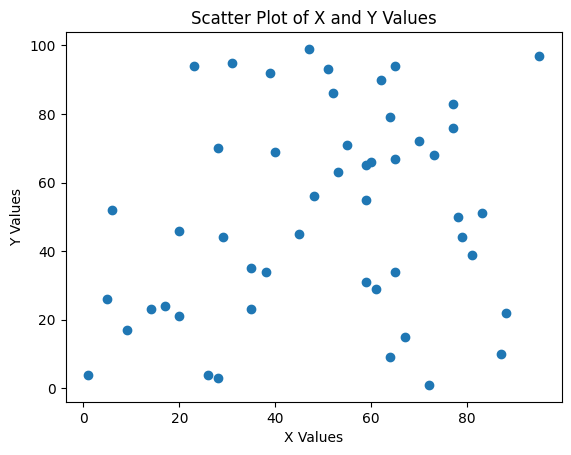

In [213]:
plt.scatter(points[:,0], points[:,1])
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X and Y Values')
plt.show();

3. Using `None` as a slice, convert the array `points` into an array of shape `(50, 1, 2)` and assign the result to `points1

In [214]:
points1 = points[:,None,:]
points1.shape

(50, 1, 2)

4. Using `None` as a slice, convert the array `points` into an array of shape `(1, 50, 2)` and assign the result to `points2`.

In [215]:
points2 = points[None,:,:]  
points2.shape

(1, 50, 2)

5.  Now, compute and rank the distances between any pair of points as follows. Recall that the square distance between points $a = (a_0, a_1)$ and $b = (b_0, b_1)$ in the $x, y$-plane is the sum of the squared differences in each dimension:
  $$
  \|a - b\|^2 = (a_0 - b_0)^2 + (a_1 - b_1)^2.
  $$
  First, using two suitably reshaped (via `None` slices) variants of the `points` array, compute a 3D array `diffs` whose $i,j$-entry is `points[i] - points[j]`.

In [216]:
diffs = points1 - points2

6. Compute the squares of the values in `diffs` and assign the result to `diffs2`.

In [217]:
diffs2 = np.square(diffs)

7. Using `np.sum` with argument `axis=-1`, add the $x$ and $y$ components of the squared differences in `diff2` and assign the result to `dist2`.

In [218]:
dist2 = np.sum(diffs2, axis=-1)

8. Optionally, display `dist2` as an image  

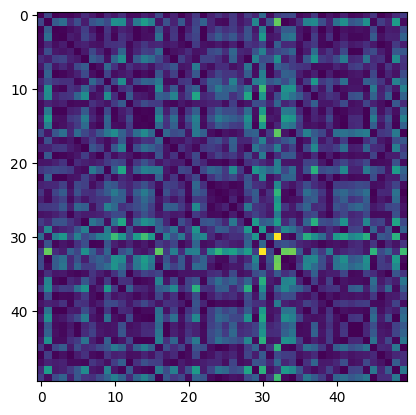

In [219]:
plt.imshow(dist2)

9. Check if the diagonal is $0$.  Look up the documentation of `np.diagonal`.

In [220]:
np.all(np.diagonal(dist2) == 0)

np.True_

10. Next, for each point $a$, rank its neighbours by distance. That is: apply `np.argsort` to each row of `dist2`.  Assign the result to `nearest`.

In [221]:
nearest = np.argsort(dist2)

11.  Finally, plot the points and join each point with its two nearest neighbors by an edge:  start with a scatter plot of all $50$ points.  Then, loop over all the points.  For each point `points[i]` find the indices `j` of its two nearest neighbors, then use a command like
  ```python
  plt.plot(*zip(points[i], points[j]), color='r', alpha=0.5)
  ```
  to draw an edge between them.

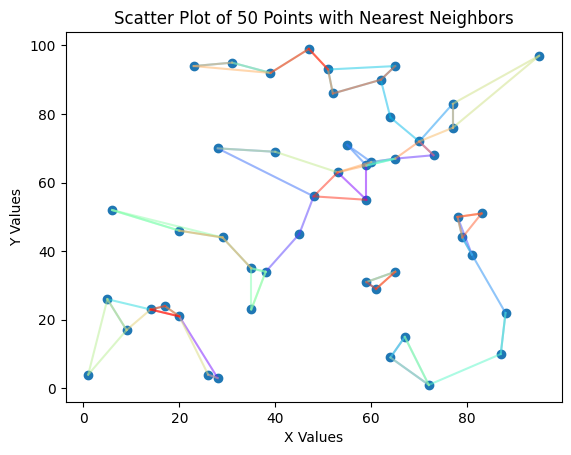

In [222]:
import matplotlib.cm as cm

plt.scatter(points[:,0], points[:,1])
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of 50 Points with Nearest Neighbors')

for i in range(len(points)):
    for j in nearest[i, 1:3]:  # Get the indices of the two nearest neighbors
        plt.plot(*zip(points[i], points[j]), color=colors[i], alpha=0.5)

plt.show()


##  Submit your work in PDF format!